1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [5]:
!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

--2022-12-02 10:03:41--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-12-02 10:03:41--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8030f912110a5e34900f9fb87a.dl.dropboxusercontent.com/cd/0/inline/Bx1T34eGx08k9M0XPsGcEJlvwuXOtzWi0L-AovmW0BOZ6Hn-EhS5NTwlYBUzFKwCd-yhiSfz7bhyXSrOab7Tm0gzhoJp4FhaCu6iQwzZaqmgvhISWCH48jaSLrotJbaUpdKvXgLWFEJzTpS-sFxp1sq2GTrPoJ5xMIE5aND6g0FGFQ/file# [following]
--2022-12-02 10:03:42--  https://uc8030f912110a5e34900f9fb87a.dl.dropboxusercontent.com/cd/0/inline/Bx1T34eGx08k9M0XPsGcEJlvwuXOtzWi0L-AovmW0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b3207e700>,
      dtype=object)

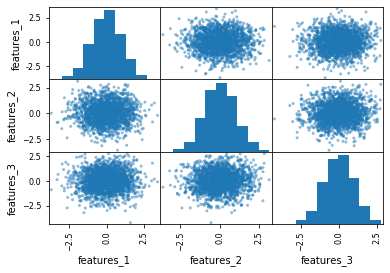

In [3]:
regression_data = pd.read_csv("regression_generated.csv")
pd.plotting.scatter_matrix(regression_data[['features_1','features_2', 'features_3']])

In [4]:
correlation = regression_data[['features_1','features_2', 'features_3']].corr()
correlation

,features_1,features_2,features_3
features_1,1.00000,-0.00522,0.02369
features_2,-0.00522,1.00000,0.04736
features_3,0.02369,0.04736,1.00000


Text(0.5, 1.0, 'Correlation between features_1, features_2, features_3')

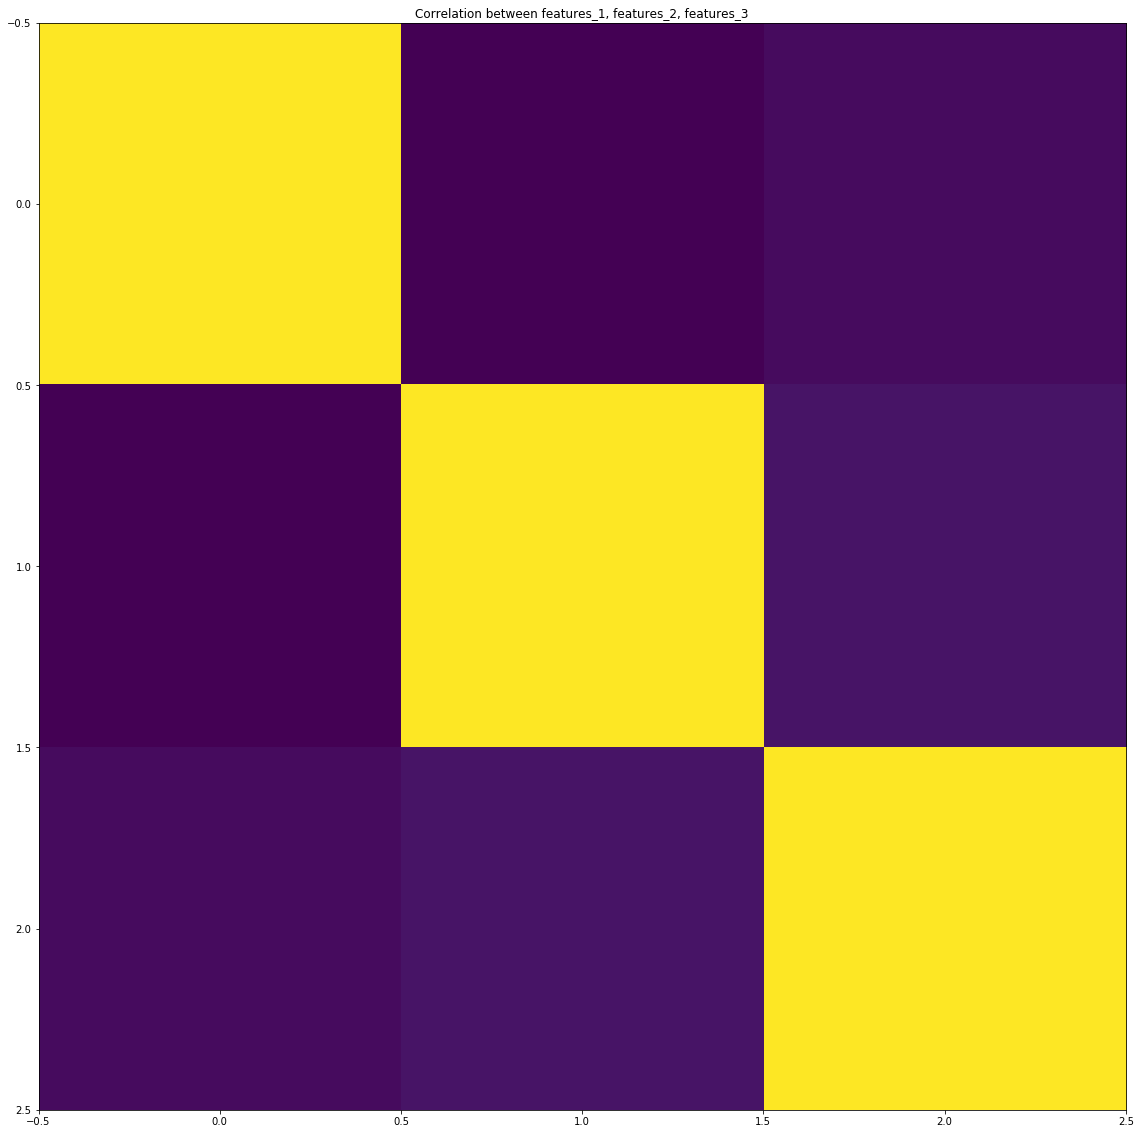

In [5]:
plt.figure(figsize = (20, 20))
plt.tight_layout()
plt.imshow(correlation, interpolation='nearest')
plt.title("Correlation between features_1, features_2, features_3")

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

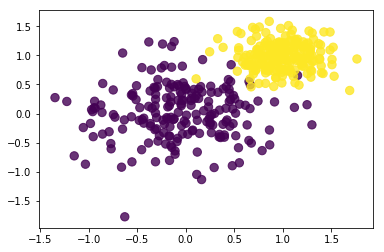

In [6]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

Text(0.5, 1.0, '2D datasets')

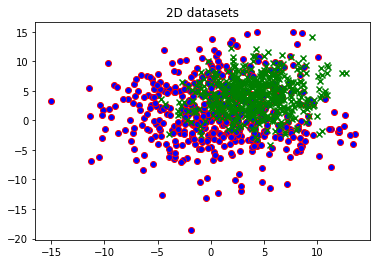

In [25]:
def generate2Dataset (mean1, mean2, sigma1, sigma2, size):
    x1 = np.random.normal(mean1, sigma1, size)
    y1 = np.random.normal(mean1, sigma1, size)
    x2 = np.random.normal(mean2, sigma2, size)
    y2 = np.random.normal(mean2, sigma2, size)
    return ((x1, y1), (x2, y2))
dataset = generate2Dataset(1, 4, 5, 3, 500)

fig, ax = plt.subplots()
ax.scatter(dataset[0][0], dataset[0][1], marker='o', c='b', edgecolor='r')
ax.scatter(dataset[1][0], dataset[1][1], marker='x', c='g', edgecolor='g')
plt.title('2D datasets')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [33]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-12-02 10:59:57--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-02 10:59:58--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbda0aec09807d8a691030e4eb0.dl.dropboxusercontent.com/cd/0/inline/Bx3WwwRhbC30piWAeL5EJqtSKhOmO4HWbGB0DmQ0Tz6Gz_MTajI_uogmymDva7B12LKsgHCux4YbMlwsC1qaYSOZbOTfS2CzNen7fAhr8qjiOkRZoAO5rEPMMENkKGggZqBzd01ziQLNKE1DyZMHqBKcjLiRdYa0ouwhxkDdlfYYvQ/file# [following]
--2022-12-02 10:59:58--  https://ucbda0aec09807d8a691030e4eb0.dl.dropboxusercontent.com/cd/0/inline/Bx3WwwRhbC30piWAeL5EJqtSKhOmO4HWbGB0DmQ0Tz6Gz_MTajI_uogmymDva7

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.
